In [2]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import typing
import os
import numpy as np

%matplotlib notebook

In [3]:
def txt_to_pd(name: str)-> pd.DataFrame:

    lst = []
    with open(name) as f:
        for line in f:
            nup = re.search(r'(?<=Nup =)[\d\.-]+', line).group()
            ndown, e, w, l = re.findall(r'(?<== )[\d\.-]+', line)
            lst.append({'Nup':float(nup), 'Ndown':float(ndown), 'E':float(e)})
    df = pd.DataFrame(lst)
    return df.groupby(['Nup','Ndown']).min().reset_index()

In [4]:
df_w2 = txt_to_pd('W2_0.300000_energies.txt')

In [5]:
def get_gap(n: int, df: pd.DataFrame)->float:
    a = df[(df.Nup == n+1) & (df.Ndown == 2*n+2)].E.values[0]
    b = df[(df.Nup == n) & (df.Ndown == 2*n)].E.values[0]
    c = df[(df.Nup == n+1) & (df.Ndown == 2*n+1)].E.values[0]
    d = df[(df.Nup == n) & (df.Ndown == 2*n+1)].E.values[0]
    return -(a+b-c-d)

In [6]:
df_w3 = txt_to_pd('W3_0.300000_energies.txt')

In [7]:
df_w4 = txt_to_pd('W4_0.300000_energies.txt')

<IPython.core.display.Javascript object>


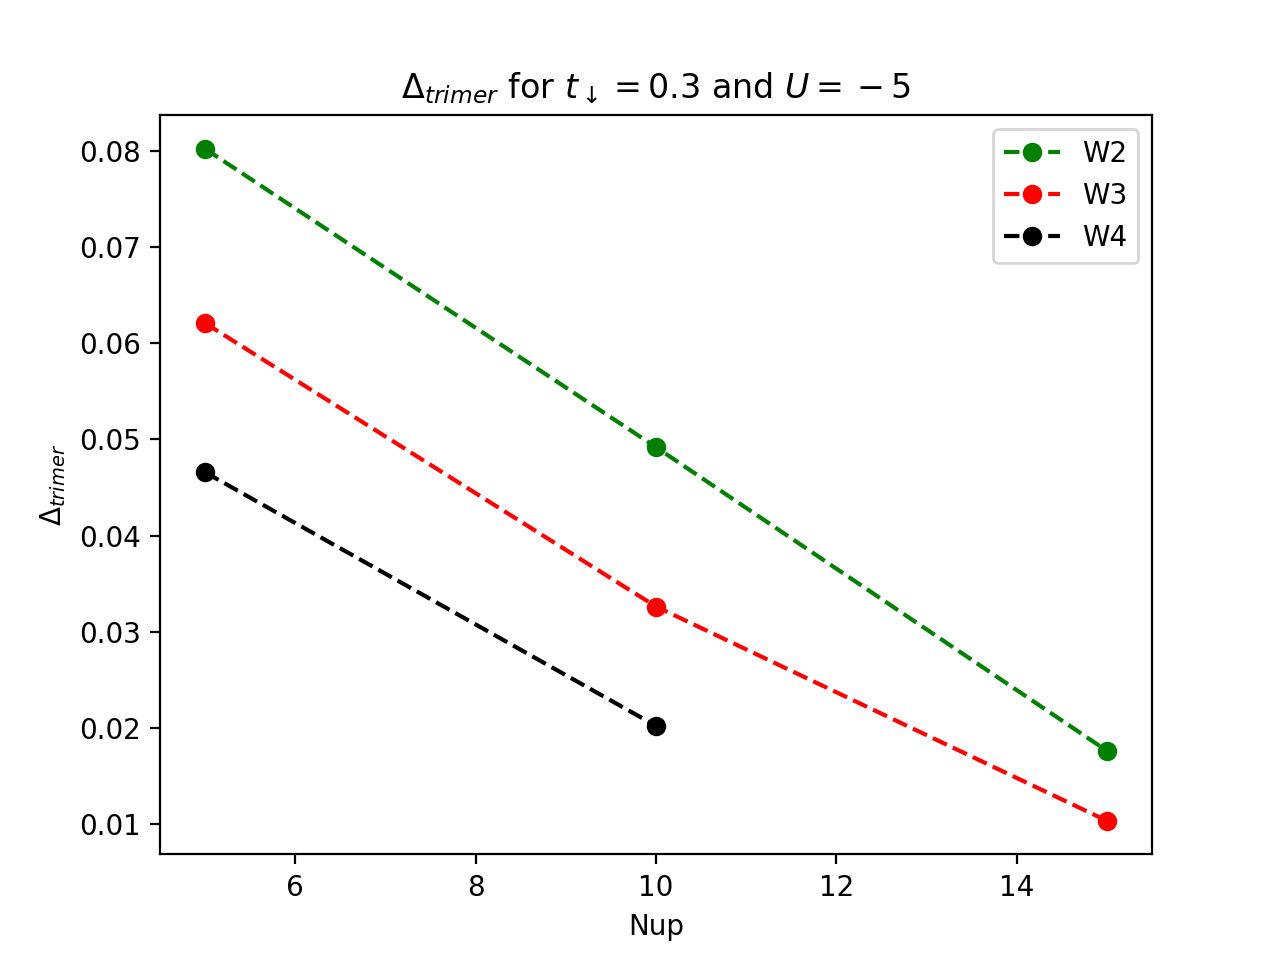

In [8]:
x = list(range(5,20,5))

W2 = [get_gap(i,df_w2) for i in x]
W3 = [get_gap(i,df_w3) for i in x]
W4 = [get_gap(i,df_w4) for i in [5,10]]

plt.plot(x, W2, 'o--', c= 'green', label = 'W2')
plt.plot(x, W3, 'o--', c= 'red', label = 'W3')
plt.plot([5,10], W4, 'o--', c= 'black', label = 'W4')
plt.xlabel('Nup')
plt.ylabel(r'$\Delta_{trimer}$')
plt.title(r'$\Delta_{trimer}$ for $t_{\downarrow} = 0.3$ and $U = -5$')
plt.legend()

In [48]:
1419/60

23.65

## Докинуть W = 1 на график

+ И сюда же тримерную щель

+ перерисовать как функцию плотности

Среднее N_up\*N_down 

10 на 1 ноге и 20 на 2 ногах. Верно ли, что нужно сравнивать фактор заполнения типа N/(W\*L)

Число частиц

Проверить начальное состояние vs скорость сходимости и сходится ли в одну точку. 